In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
data_path = "/Users/nus/aurek-data-crunch/data/"

In [4]:
cozie = pd.read_csv(data_path+"merged_mbient_cozie.csv", index_col='Unnamed: 0', parse_dates=True)



In [5]:
cozie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 16
Data columns (total 12 columns):
heartRate            789 non-null float64
illuminance          70 non-null float64
lat                  329 non-null float64
long                 329 non-null float64
relative_humidity    0 non-null float64
sensor_id            71 non-null object
sensor_location      71 non-null object
temperature          71 non-null float64
thermal              957 non-null int64
time                 957 non-null object
user_id_x            957 non-null object
user_id_y            71 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 97.2+ KB


In [6]:
mbient = pd.read_csv(data_path+"ambient.csv")

In [7]:
mbient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306166 entries, 0 to 306165
Data columns (total 6 columns):
Unnamed: 0           306166 non-null object
relative_humidity    174122 non-null float64
temperature          296281 non-null float64
sensor_id            306166 non-null object
sensor_location      214922 non-null object
illuminance          246414 non-null float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [8]:
mbient[mbient.sensor_location=='wrist'].head()

,Unnamed: 0,relative_humidity,temperature,sensor_id,sensor_location,illuminance
84689,2019-03-19 16:24:00+08:00,NaN,24.625,CF9C782CCD54,wrist,23.458250
84690,2019-03-19 16:25:00+08:00,NaN,24.375,CF9C782CCD54,wrist,28.399317
84691,2019-03-19 16:26:00+08:00,NaN,24.750,CF9C782CCD54,wrist,31.914850
84692,2019-03-19 16:27:00+08:00,NaN,24.500,CF9C782CCD54,wrist,32.855833
84693,2019-03-19 16:28:00+08:00,NaN,24.375,CF9C782CCD54,wrist,32.737383


In [9]:
mbient.head()

,Unnamed: 0,relative_humidity,temperature,sensor_id,sensor_location,illuminance
0,2019-02-15 12:09:00+08:00,58.521,26.125,CA765DE3AC07,NaN,NaN
1,2019-02-15 12:10:00+08:00,59.354,26.250,CA765DE3AC07,NaN,NaN
2,2019-02-15 12:11:00+08:00,61.303,26.875,CA765DE3AC07,NaN,NaN
3,2019-02-15 12:12:00+08:00,61.224,27.375,CA765DE3AC07,NaN,NaN
4,2019-02-15 12:13:00+08:00,60.752,27.500,CA765DE3AC07,NaN,NaN


In [10]:
mbient_temp = pd.pivot_table(mbient[mbient.sensor_location=='wrist'], index="Unnamed: 0", columns='sensor_id', values='temperature')

In [11]:
mbient_temp.index = pd.to_datetime(mbient_temp.index)

In [12]:
mbient_temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45415 entries, 2019-03-19 08:24:00 to 2019-04-26 07:34:00
Data columns (total 5 columns):
CF9C782CCD54    12746 non-null float64
D0E0285C1CB1    27095 non-null float64
D242E39B197A    24294 non-null float64
D401BBA13BE8    22281 non-null float64
D8DF586AB6CD    25468 non-null float64
dtypes: float64(5)
memory usage: 2.1 MB


In [13]:
mbient_hourly_temp = mbient_temp.resample("H").mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113a2cc50>,
      dtype=object)

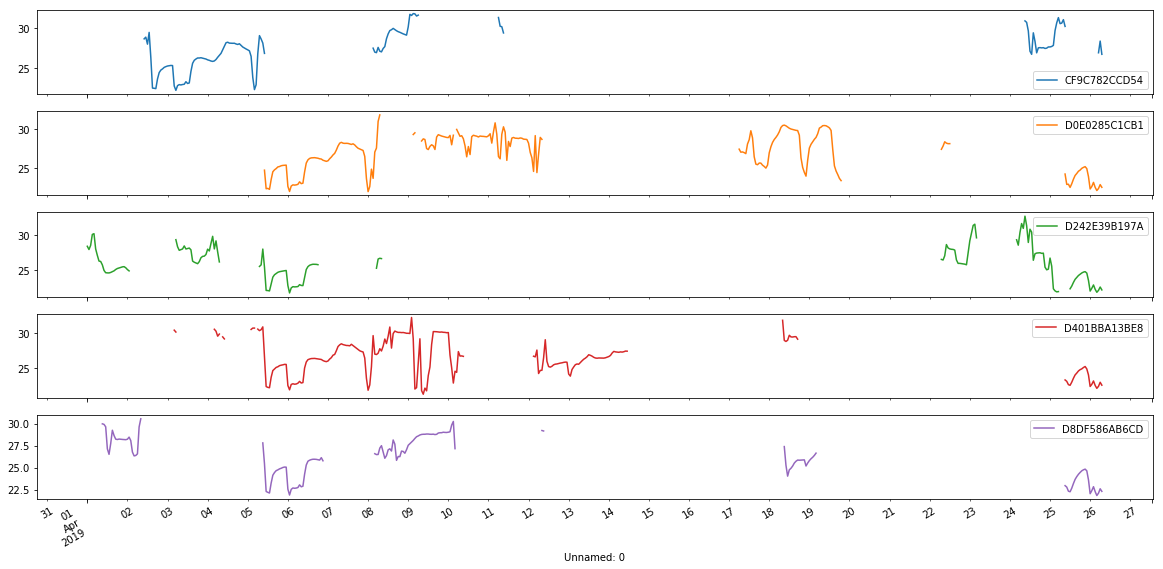

In [15]:
mbient_hourly_temp.truncate(before='2019-04-01').plot(figsize=(20,10), subplots=True)

In [16]:
mbient_hourly_temp

sensor_id,CF9C782CCD54,D0E0285C1CB1,D242E39B197A,D401BBA13BE8,D8DF586AB6CD
Unnamed: 0,,,,,
2019-03-19 08:00:00,24.486111,24.294118,23.669118,24.378571,23.878571
2019-03-19 09:00:00,25.039583,24.795833,24.235417,24.741667,24.327083
2019-03-19 10:00:00,23.801471,23.985417,23.508475,23.961864,23.545673
2019-03-19 11:00:00,23.200521,23.213983,22.752604,23.218220,22.752119
2019-03-19 12:00:00,23.168269,23.155612,22.745370,23.175000,22.735169
2019-03-19 13:00:00,23.110677,23.093220,22.639831,23.125000,22.662500
2019-03-19 14:00:00,23.957627,23.928571,23.406780,24.070312,23.457627
2019-03-19 15:00:00,25.101293,24.955000,24.493644,25.112288,24.534483
2019-03-19 16:00:00,25.487288,25.397959,24.859694,25.533898,24.936441
